In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 1️⃣ 폰트 설치 (Ubuntu/Colab 전용)
!apt-get -qq install fonts-nanum

# 2️⃣ 폰트 경로 지정 및 matplotlib에 등록
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fe = fm.FontEntry(fname=font_path, name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

# 3️⃣ matplotlib에 한글 폰트 적용
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})  # 폰트 설정


In [61]:
base_path = "/content/drive/MyDrive/SeD1st/1st Dataton/JDG/"

files = [
    "K.콘텐츠_시청경험_22-23.csv",
    "K.인당스마트폰_이용대수_21-23.csv",
    "K.유료서비스_이용경험여부_21-23.csv",  # 공백 제거함
    "K.서비스별_이용경험여부21-23.csv",
    "K.서비스별_구독연장여부21-23.csv",
    "J.이용빈도21-23.csv",
    "J.이용료의_현재_금액_대비_최대_지불_의향_21-23.csv",  # 공백 제거 및 형식 통일
    "J.유료서비스_이용기간_전체_23-21.csv",  # 공백 제거 및 형식 통일
    "J.유료서비스_월평균_이용금액_21-23.csv"  # 공백 제거
]

file_paths = [base_path + filename for filename in files]


In [62]:
import pandas as pd

dfs = {filename: pd.read_csv(path) for filename, path in zip(files, file_paths)}


In [63]:
import pandas as pd

base_path = "/content/drive/MyDrive/SeD1st/1st Dataton/JDG/"

files = [
    "K.콘텐츠_시청경험_22-23.csv",
    "K.인당스마트폰_이용대수_21-23.csv",
    "K.유료서비스_이용경험여부_21-23.csv",
    "K.서비스별_이용경험여부21-23.csv",
    "K.서비스별_구독연장여부21-23.csv",
    "J.이용빈도21-23.csv",
    "J.이용료의_현재_금액_대비_최대_지불_의향_21-23.csv",
    "J.유료서비스_이용기간_전체_23-21.csv",
    "J.유료서비스_월평균_이용금액_21-23.csv"
]

# 파일 로드 및 head 출력
for file in files:
    df = pd.read_csv(base_path + file)
    print(f"\n===== {file} =====")
    print(df.head())



===== K.콘텐츠_시청경험_22-23.csv =====
   구분별(1)  구분별(2)       2023     2023.1     2023.2       2022     2022.1  \
0  구분별(1)  구분별(2)  사례수 (가구원)  경험 있음 (%)  경험 없음 (%)  사례수 (가구원)  경험 있음 (%)   
1      전체      소계      29222       26.8       73.2      31254       22.5   
2      성별      남자      14554       27.1       72.9      15567       23.5   
3      성별      여자      14668       26.4       73.6      15687       21.6   
4     연령별  13-19세       1980       30.9       69.1       2149       29.8   

      2022.2  
0  경험 없음 (%)  
1       77.5  
2       76.5  
3       78.4  
4       70.2  

===== K.인당스마트폰_이용대수_21-23.csv =====
   구분별(1)  구분별(2)       2023  2023.1  2023.2     2023.3         2023.4  \
0  구분별(1)  구분별(2)  사례수 (가구원)  1대 (%)  2대 (%)  3대 이상 (%)  스마트폰  비이용 (%)   
1      전체      소계      29222    95.1     0.3        0.1            4.5   
2      성별      남자      14554    96.2     0.3        0.1            3.4   
3      성별      여자      14668    94.0     0.2        0.2            5.6   
4     연령별  1

In [64]:
df = pd.read_csv("/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.이용빈도21-23.csv")
print(df)

    구분별(2)       2023       2023.1      2023.2      2023.3      2023.4  \
0   구분별(2)  사례수 (가구원)  주 1일 미만 (%)  주 1-2일 (%)  주 3-4일 (%)  주 5-6일 (%)   
1       소계      29222          2.2        11.4        19.2        16.0   
2       남자      14554          2.5        11.4        18.5        16.3   
3       여자      14668          1.9        11.4        19.9        15.6   
4   13~19세       1980          2.4        12.5        19.0        16.9   
5      20대       4048          2.1        12.5        23.3        19.0   
6      30대       4254          3.1        13.8        22.6        18.0   
7      40대       4985          2.9        15.7        20.4        18.2   
8      50대       5361          2.3        12.6        21.0        18.7   
9      60대       5444          1.8         8.1        18.3        13.2   
10  70세 이상       3151          0.5         3.0         6.2         5.3   

      2023.5       2023.6       2022       2022.1  ...      2022.4    2022.5  \
0   주 7일 (%)  OTT 비이용 (%)  사례수 

In [65]:
# 가중치 설정
weights = {
    '2021.1': 1, '2021.2': 2, '2021.3': 3, '2021.4': 4, '2021.5': 5,
    '2022.1': 1, '2022.2': 2, '2022.3': 3, '2022.4': 4, '2022.5': 5,
    '2023.1': 1, '2023.2': 2, '2023.3': 3, '2023.4': 4, '2023.5': 5,
}

# 가중치 계산 전 수치형 변환
for col in weights:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 연도별 충성도 지수 계산
df['충성도지수_2021'] = df[['2021.1', '2021.2', '2021.3', '2021.4', '2021.5']].dot([1, 2, 3, 4, 5])
df['충성도지수_2022'] = df[['2022.1', '2022.2', '2022.3', '2022.4', '2022.5']].dot([1, 2, 3, 4, 5])
df['충성도지수_2023'] = df[['2023.1', '2023.2', '2023.3', '2023.4', '2023.5']].dot([1, 2, 3, 4, 5])

# 결과 출력
print(df[['구분별(2)', '충성도지수_2021', '충성도지수_2022', '충성도지수_2023']])


    구분별(2)  충성도지수_2021  충성도지수_2022  충성도지수_2023
0   구분별(2)         NaN         NaN         NaN
1       소계       241.5       257.4       236.6
2       남자       250.6       267.7       243.0
3       여자       231.9       247.2       229.8
4   13~19세       321.8       346.2       292.0
5      20대       337.2       354.9       325.0
6      30대       312.3       324.1       290.5
7      40대       275.6       296.2       269.3
8      50대       229.5       251.6       238.3
9      60대       158.1       177.5       176.7
10  70세 이상        48.6        61.9        64.8


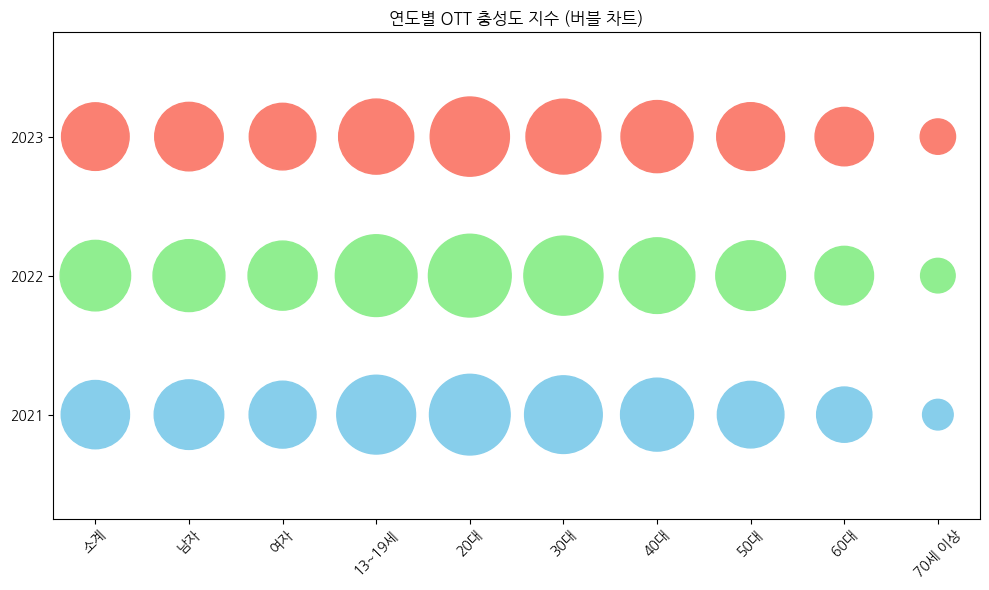

In [66]:
import matplotlib.pyplot as plt

# 시각화 대상 필터링
df_plot = df[df['구분별(2)'] != '구분별(2)'].copy()
df_plot = df_plot.set_index('구분별(2)')

# 연도 및 색상 설정
years = ['2021', '2022', '2023']
colors = ['skyblue', 'lightgreen', 'salmon']
x_labels = df_plot.index.tolist()
x = range(len(x_labels))

# 연도 간 간격 줄이기 위해 y 좌표 수동 설정 (위아래 여백 확보 포함)
y_positions = [0.1, 0.5, 0.9]  # 원래 [0, 1, 2] 대신

plt.figure(figsize=(10, 6))
for i, year in enumerate(years):
    sizes = df_plot[f'충성도지수_{year}'] * 10
    plt.scatter(
        x,
        [y_positions[i]] * len(x),
        s=sizes,
        alpha=1,
        label=year,
        color=colors[i]
    )

plt.xticks(x, x_labels, rotation=45)
plt.yticks(y_positions, years)
plt.title('연도별 OTT 충성도 지수 (버블 차트)')
plt.ylim(-0.2, 1.2)  # 위아래 공간 확보
plt.tight_layout()
plt.show()


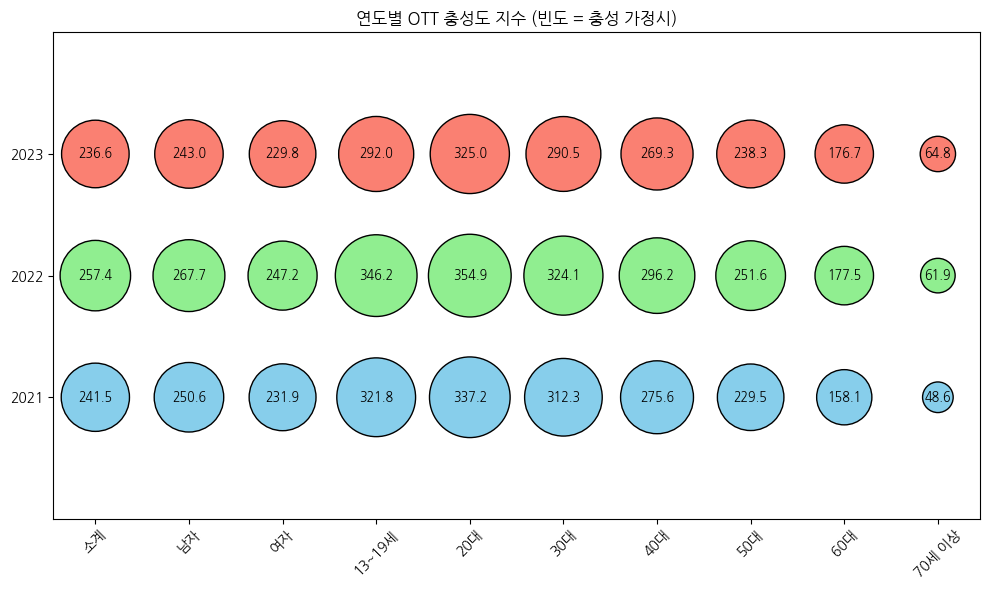

In [67]:
import matplotlib.pyplot as plt

# 시각화 대상 필터링
df_plot = df[df['구분별(2)'] != '구분별(2)'].copy()
df_plot = df_plot.set_index('구분별(2)')

# 연도별 버블차트
years = ['2021', '2022', '2023']
colors = ['skyblue', 'lightgreen', 'salmon']
x_labels = df_plot.index.tolist()
x = range(len(x_labels))

# y 위치 간격 압축
y_positions = [0.2, 0.5, 0.8]  # 연도별 y좌표 압축

plt.figure(figsize=(10, 6))

for i, year in enumerate(years):
    sizes = df_plot[f'충성도지수_{year}'] * 10
    y = [y_positions[i]] * len(x)
    plt.scatter(
        x,
        y,
        s=sizes,
        alpha=1,
        label=year,
        color=colors[i],
        edgecolors='black',
        marker='o'
    )
    # 숫자 텍스트 추가
    for j, label in enumerate(x_labels):
        value = df_plot.loc[label, f'충성도지수_{year}']
        plt.text(x[j], y_positions[i], f"{value:.1f}", ha='center', va='center', fontsize=9, color='black')

plt.xticks(x, x_labels, rotation=45)
plt.yticks(y_positions, years)
plt.title('연도별 OTT 충성도 지수 (빈도 = 충성 가정시)')
plt.ylim(-0.1, 1.1)  # 여백 유지
plt.tight_layout()
plt.show()


In [68]:
df1 = pd.read_csv("/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.유료서비스_이용기간_전체_23-21.csv")
print(df1)

    구분별(2)       2023      2023.1          2023.2         2023.3  \
0   구분별(2)  사례수 (가구원)  3개월 미만 (%)  3개월-6개월 미만 (%)  6개월-1년 미만 (%)   
1       소계      29222         0.5             1.3            4.7   
2       남자      14554         0.5             1.4            5.0   
3       여자      14668         0.5             1.2            4.3   
4   13~19세       1980         0.7             2.1            3.5   
5      20대       4048         0.7             2.5            9.3   
6      30대       4254         0.7             2.3            9.4   
7      40대       4985         0.6             1.5            5.6   
8      50대       5361         0.4             1.1            3.1   
9      60대       5444         0.2             0.2            1.2   
10  70세 이상       3151         0.1             0.0            0.3   

              2023.4            2023.5     2023.6   2023.7       2022  ...  \
0   1년-1년 6개월 미만 (%)  1년 6개월-2년 미만 (%)  2년 이상 (%)  비이용 (%)  사례수 (가구원)  ...   
1                6.8       

In [69]:
# 충성도 점수 계산을 위한 가중치 설정
weights_by_year = {
    '2021': {'2021.1': 1, '2021.2': 2, '2021.3': 3, '2021.4': 4, '2021.5': 5, '2021.6': 6},
    '2022': {'2022.1': 1, '2022.2': 2, '2022.3': 3, '2022.4': 4, '2022.5': 5, '2022.6': 6},
    '2023': {'2023.1': 1, '2023.2': 2, '2023.3': 3, '2023.4': 4, '2023.5': 5, '2023.6': 6},
}

# 계산용 필터링
df1_filtered = df1[df1['구분별(2)'] != '구분별(2)'].copy()

# 연도별 충성도 점수 계산
for year, weights in weights_by_year.items():
    df1_filtered[f'충성도지수_{year}'] = df1_filtered[list(weights.keys())].astype(float).mul(list(weights.values()), axis=1).sum(axis=1)

# 결과 출력
print(df1_filtered[['구분별(2)', '충성도지수_2021', '충성도지수_2022', '충성도지수_2023']])


    구분별(2)  충성도지수_2021  충성도지수_2022  충성도지수_2023
1       소계        69.2       110.1       109.8
2       남자        72.0       117.5       117.2
3       여자        66.5       103.1       103.1
4   13~19세        58.6       115.1        86.0
5      20대       151.7       222.7       205.1
6      30대       139.9       203.6       205.0
7      40대        76.3       130.3       150.7
8      50대        32.5        75.4        77.1
9      60대         9.3        21.3        29.2
10  70세 이상         3.1         2.9         6.4


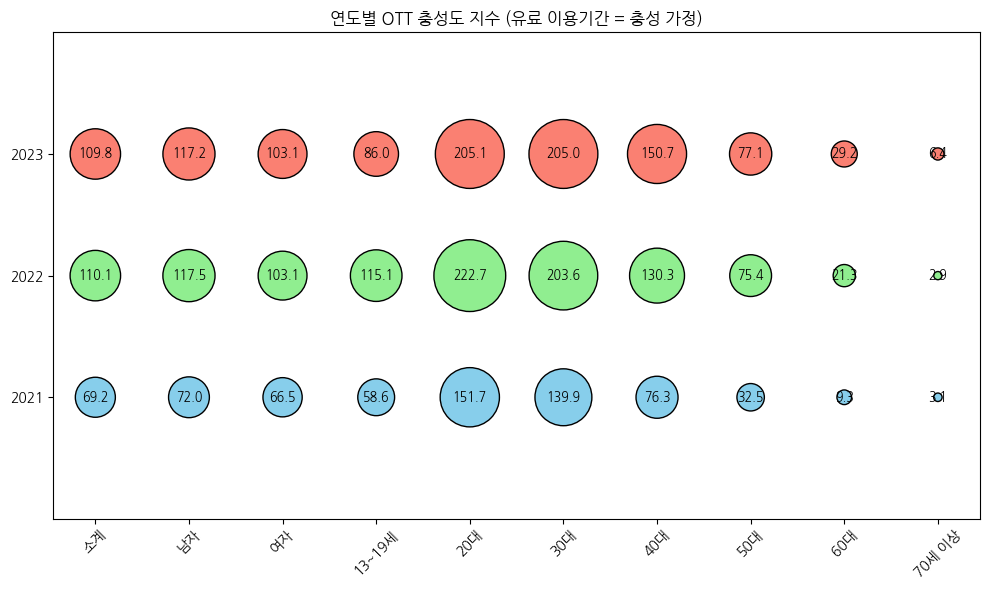

In [70]:
import matplotlib.pyplot as plt

# df1_filtered 컬럼 확인 후 인덱스 설정
if '구분별(2)' in df1_filtered.columns:
    df_plot = df1_filtered.set_index('구분별(2)')
else:
    df_plot = df1_filtered.copy()

# 연도별 설정
years = ['2021', '2022', '2023']
colors = ['skyblue', 'lightgreen', 'salmon']
x_labels = df_plot.index.tolist()
x = range(len(x_labels))
y_positions = [0.2, 0.5, 0.8]  # 간격 압축된 y 위치

plt.figure(figsize=(10, 6))

for i, year in enumerate(years):
    sizes = df_plot[f'충성도지수_{year}'] * 12
    y = [y_positions[i]] * len(x)
    plt.scatter(
        x, y,
        s=sizes,
        alpha=1,
        label=year,
        color=colors[i],
        edgecolors='black'
    )
    for j, label in enumerate(x_labels):
        value = df_plot.loc[label, f'충성도지수_{year}']
        plt.text(x[j], y_positions[i], f"{value:.1f}", ha='center', va='center', fontsize=9, color='black')

plt.xticks(x, x_labels, rotation=45)
plt.yticks(y_positions, years)
plt.ylim(-0.1, 1.1)
plt.title('연도별 OTT 충성도 지수 (유료 이용기간 = 충성 가정)')
plt.tight_layout()
plt.show()


In [71]:
df2 = pd.read_csv("/content/drive/MyDrive/SeD1st/1st Dataton/JDG/K.콘텐츠_시청경험_22-23.csv")
print(df2)

    구분별(1)  구분별(2)       2023     2023.1     2023.2       2022     2022.1  \
0   구분별(1)  구분별(2)  사례수 (가구원)  경험 있음 (%)  경험 없음 (%)  사례수 (가구원)  경험 있음 (%)   
1       전체      소계      29222       26.8       73.2      31254       22.5   
2       성별      남자      14554       27.1       72.9      15567       23.5   
3       성별      여자      14668       26.4       73.6      15687       21.6   
4      연령별  13-19세       1980       30.9       69.1       2149       29.8   
5      연령별     20대       4048       52.1       47.9       4508       45.8   
6      연령별     30대       4254       45.8       54.2       4595       39.6   
7      연령별     40대       4985       34.0       66.0       5421       25.7   
8      연령별     50대       5361       19.3       80.7       5757       15.0   
9      연령별     60대       5444        6.9       93.1       5220        4.6   
10     연령별  70세 이상       3151        1.4       98.6       3604        0.6   

       2022.2  
0   경험 없음 (%)  
1        77.5  
2        76.5  
3        78

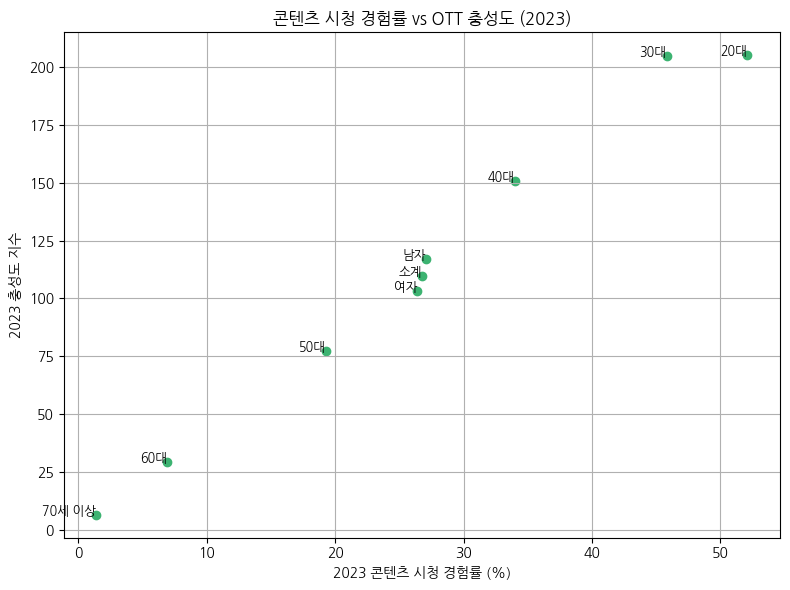

            시청경험률_2023  충성도지수_2023
시청경험률_2023    1.000000    0.993372
충성도지수_2023    0.993372    1.000000


In [72]:
# 1. 필요한 열만 추출하여 정리
df2_clean = df2[df2['구분별(1)'] != '구분별(1)'][['구분별(2)', '2023.1']].copy()
df2_clean = df2_clean.rename(columns={'2023.1': '시청경험률_2023'})

# 문자열을 숫자로 변환
df2_clean['시청경험률_2023'] = df2_clean['시청경험률_2023'].astype(float)

# 2. df1_filtered에서 충성도지수_2023 열만 추출
df1_clean = df1_filtered[['구분별(2)', '충성도지수_2023']].copy()

# 3. 두 데이터프레임 병합
merged = pd.merge(df2_clean, df1_clean, on='구분별(2)', how='inner')

# 4. 시각화: 시청 경험률 vs 충성도지수
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged['시청경험률_2023'], merged['충성도지수_2023'], color='mediumseagreen')
for i, row in merged.iterrows():
    plt.text(row['시청경험률_2023'], row['충성도지수_2023'], row['구분별(2)'], fontsize=9, ha='right')
plt.xlabel('2023 콘텐츠 시청 경험률 (%)')
plt.ylabel('2023 충성도 지수')
plt.title('콘텐츠 시청 경험률 vs OTT 충성도 (2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. 상관계수 확인
correlation = merged[['시청경험률_2023', '충성도지수_2023']].corr()
print(correlation)


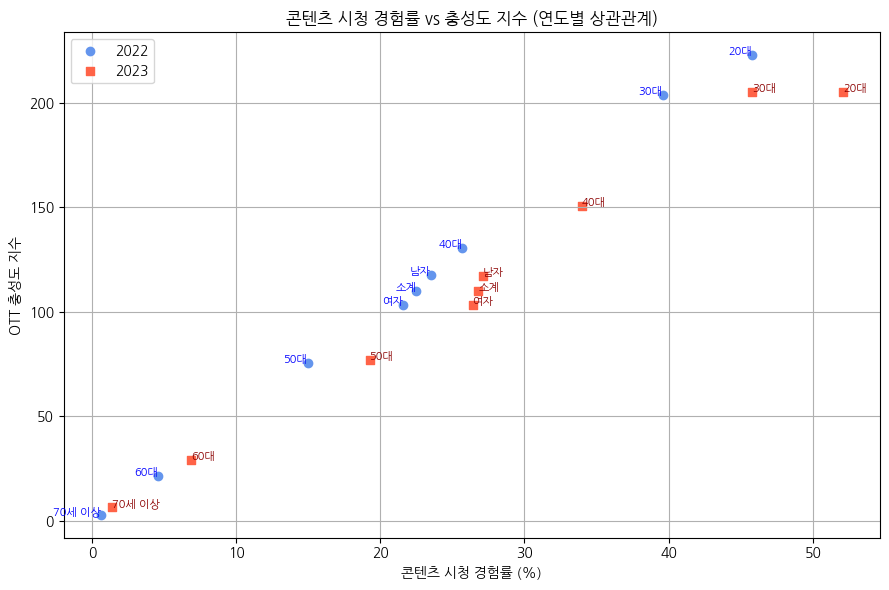

상관계수 (2022):
            시청경험률_2022  충성도지수_2022
시청경험률_2022    1.000000    0.998816
충성도지수_2022    0.998816    1.000000

상관계수 (2023):
            시청경험률_2023  충성도지수_2023
시청경험률_2023    1.000000    0.993372
충성도지수_2023    0.993372    1.000000


In [74]:
import matplotlib.pyplot as plt

# 1. df2에서 시청 경험률 정리
df2_clean = df2[df2['구분별(1)'] != '구분별(1)'][['구분별(2)', '2023.1', '2022.1']].copy()
df2_clean = df2_clean.rename(columns={
    '2023.1': '시청경험률_2023',
    '2022.1': '시청경험률_2022'
}).astype({'시청경험률_2023': float, '시청경험률_2022': float})

# 2. df1_filtered에서 충성도 지수 추출
df1_clean = df1_filtered[['구분별(2)', '충성도지수_2022', '충성도지수_2023']].copy()

# 3. 병합
merged = pd.merge(df2_clean, df1_clean, on='구분별(2)', how='inner')

# 4. 시각화
plt.figure(figsize=(9, 6))

# 2022 데이터
plt.scatter(merged['시청경험률_2022'], merged['충성도지수_2022'],
            color='cornflowerblue', label='2022', marker='o')
for i, row in merged.iterrows():
    plt.text(row['시청경험률_2022'], row['충성도지수_2022'], row['구분별(2)'], fontsize=8, color='blue', ha='right')

# 2023 데이터
plt.scatter(merged['시청경험률_2023'], merged['충성도지수_2023'],
            color='tomato', label='2023', marker='s')
for i, row in merged.iterrows():
    plt.text(row['시청경험률_2023'], row['충성도지수_2023'], row['구분별(2)'], fontsize=8, color='darkred', ha='left')

plt.xlabel('콘텐츠 시청 경험률 (%)')
plt.ylabel('OTT 충성도 지수')
plt.title('콘텐츠 시청 경험률 vs 충성도 지수 (연도별 상관관계)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. 상관계수 출력
print("상관계수 (2022):")
print(merged[['시청경험률_2022', '충성도지수_2022']].corr())

print("\n상관계수 (2023):")
print(merged[['시청경험률_2023', '충성도지수_2023']].corr())


In [76]:
df3 = pd.read_csv("/content/drive/MyDrive/SeD1st/1st Dataton/JDG/K.유료서비스_이용경험여부_21-23.csv")
print(df3)

    구분별(1)  구분별(2)       2023   2023.1    2023.2   2023.3  2023.4  2023.5  \
0   구분별(1)  구분별(2)  사례수 (가구원)  유튜브 (%)  넷플릭스 (%)  웨이브 (%)  티빙 (%)  왓챠 (%)   
1       전체      소계      29222      8.1      18.8      2.3     2.9     1.0   
2       성별      남자      14554      9.4      19.7      2.3     3.0     1.0   
3       성별      여자      14668      6.9      17.9      2.4     2.9     0.9   
4      연령별  13-19세       1980      6.6      14.7      2.6     3.0     0.3   
5      연령별     20대       4048     17.2      35.3      5.0     6.8     2.4   
6      연령별     30대       4254     14.6      36.7      5.3     6.5     1.9   
7      연령별     40대       4985      8.8      25.8      2.7     3.9     1.0   
8      연령별     50대       5361      5.3      12.9      0.8     0.7     0.7   
9      연령별     60대       5444      3.0       4.0      0.3     0.3     0.2   
10     연령별  70세 이상       3151      1.0       0.6      0.0     0.0     0.0   

         2023.6     2023.7  ...   2021.3  2021.4  2021.5  2021.6     2021.7

<ipython-input-77-8cecbf534adf>:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


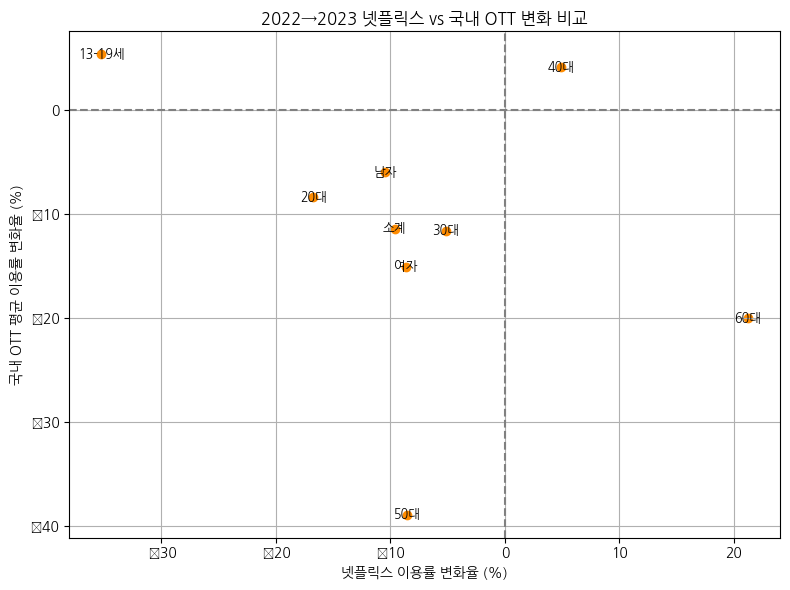

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 넷플릭스, 웨이브, 티빙, 왓챠 열만 추출
cols_needed = ['구분별(2)', '2023.2', '2023.3', '2023.4', '2023.5',
               '2022.2', '2022.3', '2022.4', '2022.5']

df3_clean = df3[df3['구분별(1)'] != '구분별(1)'][cols_needed].copy()
df3_clean.columns = ['구분별(2)', '넷플릭스_2023', '웨이브_2023', '티빙_2023', '왓챠_2023',
                               '넷플릭스_2022', '웨이브_2022', '티빙_2022', '왓챠_2022']

# 숫자형 변환
for col in df3_clean.columns[1:]:
    df3_clean[col] = pd.to_numeric(df3_clean[col], errors='coerce')

# 넷플릭스 변화율 계산
df3_clean['넷플릭스_변화율'] = ((df3_clean['넷플릭스_2023'] - df3_clean['넷플릭스_2022']) /
                            df3_clean['넷플릭스_2022']) * 100

# 국내 OTT 평균 및 변화율
df3_clean['국내OTT_2022'] = df3_clean[['웨이브_2022', '티빙_2022', '왓챠_2022']].mean(axis=1)
df3_clean['국내OTT_2023'] = df3_clean[['웨이브_2023', '티빙_2023', '왓챠_2023']].mean(axis=1)
df3_clean['국내OTT_변화율'] = ((df3_clean['국내OTT_2023'] - df3_clean['국내OTT_2022']) /
                              df3_clean['국내OTT_2022']) * 100

# 시각화
plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.scatter(df3_clean['넷플릭스_변화율'], df3_clean['국내OTT_변화율'], color='darkorange')

for i, row in df3_clean.iterrows():
    plt.text(row['넷플릭스_변화율'], row['국내OTT_변화율'], row['구분별(2)'],
             fontsize=9, ha='center', va='center')

plt.xlabel('넷플릭스 이용률 변화율 (%)')
plt.ylabel('국내 OTT 평균 이용률 변화율 (%)')
plt.title('2022→2023 넷플릭스 vs 국내 OTT 변화 비교')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-80-9d31790f98ef>:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


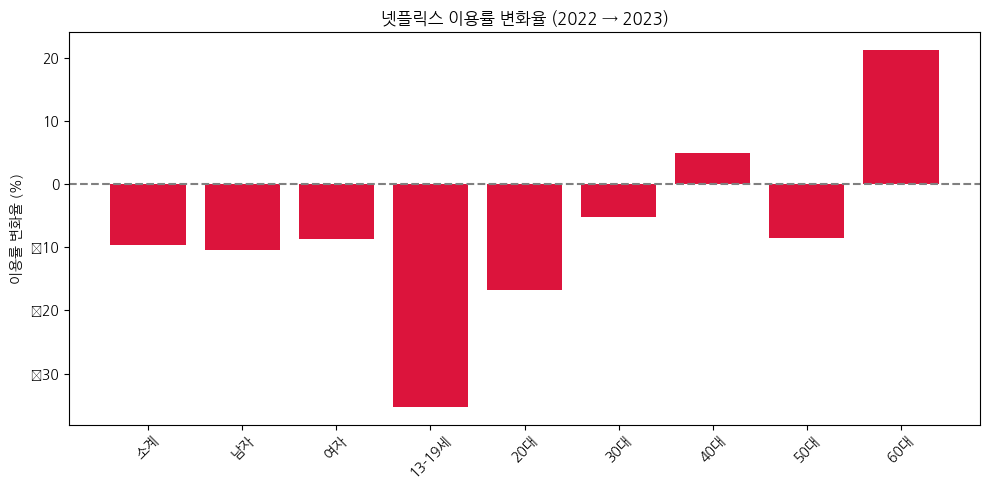

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# 넷플릭스 관련 열만 추출
cols = ['구분별(2)', '2022.2', '2023.2']
df_netflix = df3[df3['구분별(1)'] != '구분별(1)'][cols].copy()
df_netflix.columns = ['구분별(2)', '넷플릭스_2022', '넷플릭스_2023']

# '70세 이상' 제외
df_netflix = df_netflix[df_netflix['구분별(2)'] != '70세 이상']

# 숫자형 변환 및 변화율 계산
df_netflix['넷플릭스_2022'] = pd.to_numeric(df_netflix['넷플릭스_2022'], errors='coerce')
df_netflix['넷플릭스_2023'] = pd.to_numeric(df_netflix['넷플릭스_2023'], errors='coerce')
df_netflix['변화율'] = ((df_netflix['넷플릭스_2023'] - df_netflix['넷플릭스_2022']) /
                      df_netflix['넷플릭스_2022']) * 100

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(df_netflix['구분별(2)'], df_netflix['변화율'], color='crimson')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('이용률 변화율 (%)')
plt.title('넷플릭스 이용률 변화율 (2022 → 2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-79-d402eea26f2f>:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


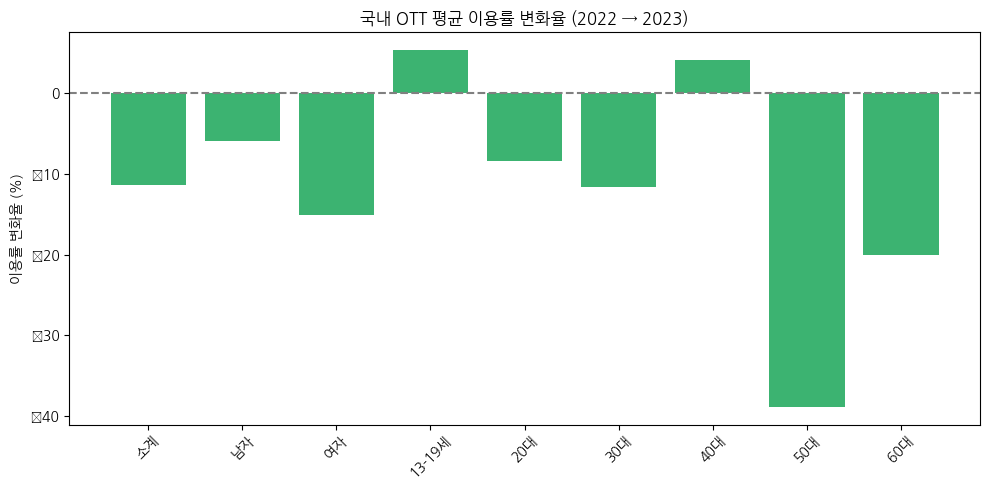

In [79]:
# 필요한 열만 추출
cols_domestic = ['구분별(2)', '2022.3', '2022.4', '2022.5', '2023.3', '2023.4', '2023.5']
df_domestic = df3[df3['구분별(1)'] != '구분별(1)'][cols_domestic].copy()
df_domestic.columns = ['구분별(2)', '웨이브_2022', '티빙_2022', '왓챠_2022',
                       '웨이브_2023', '티빙_2023', '왓챠_2023']

# 숫자형 변환 및 평균
for col in df_domestic.columns[1:]:
    df_domestic[col] = pd.to_numeric(df_domestic[col], errors='coerce')

df_domestic['국내OTT_2022'] = df_domestic[['웨이브_2022', '티빙_2022', '왓챠_2022']].mean(axis=1)
df_domestic['국내OTT_2023'] = df_domestic[['웨이브_2023', '티빙_2023', '왓챠_2023']].mean(axis=1)
df_domestic['변화율'] = ((df_domestic['국내OTT_2023'] - df_domestic['국내OTT_2022']) /
                       df_domestic['국내OTT_2022']) * 100

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(df_domestic['구분별(2)'], df_domestic['변화율'], color='mediumseagreen')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('이용률 변화율 (%)')
plt.title('국내 OTT 평균 이용률 변화율 (2022 → 2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-81-50840b70469a>:33: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


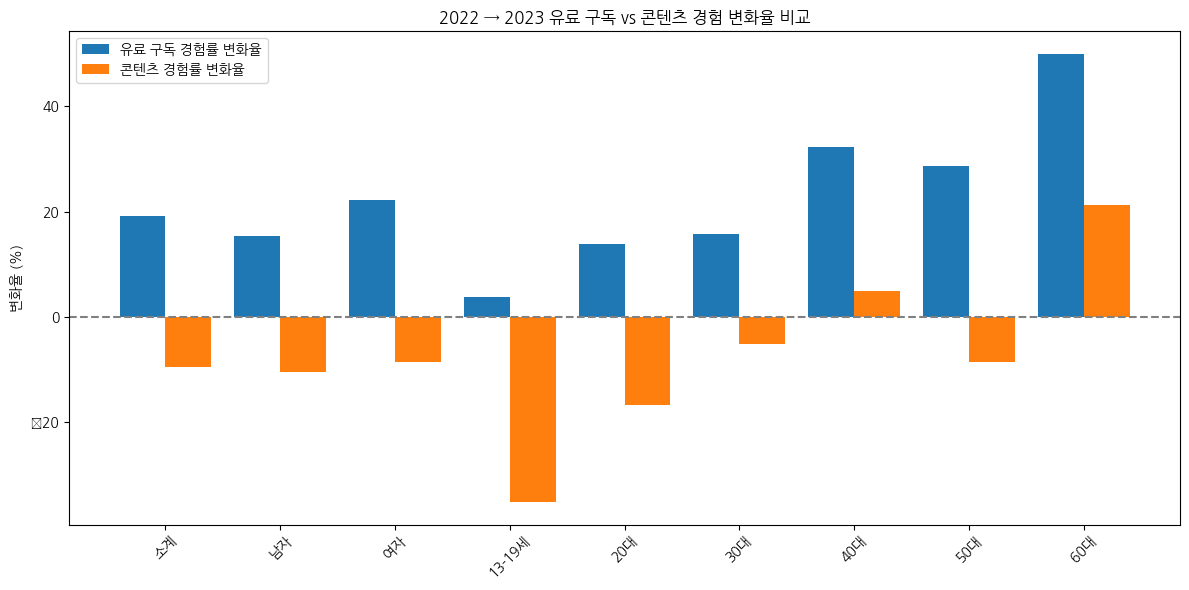

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# df2: 유료 서비스 이용 경험률
df2_filtered = df2[df2['구분별(1)'] != '구분별(1)'].copy()
df2_filtered = df2_filtered[['구분별(2)', '2022.1', '2023.1']].copy()
df2_filtered.columns = ['구분별(2)', '유료_2022', '유료_2023']
df2_filtered[['유료_2022', '유료_2023']] = df2_filtered[['유료_2022', '유료_2023']].apply(pd.to_numeric, errors='coerce')
df2_filtered['유료_변화율'] = ((df2_filtered['유료_2023'] - df2_filtered['유료_2022']) / df2_filtered['유료_2022']) * 100

# df3: 콘텐츠 시청 경험률
df3_filtered = df3[df3['구분별(1)'] != '구분별(1)'].copy()
df3_filtered = df3_filtered[['구분별(2)', '2022.2', '2023.2']].copy()
df3_filtered.columns = ['구분별(2)', '콘텐츠_2022', '콘텐츠_2023']
df3_filtered[['콘텐츠_2022', '콘텐츠_2023']] = df3_filtered[['콘텐츠_2022', '콘텐츠_2023']].apply(pd.to_numeric, errors='coerce')
df3_filtered['콘텐츠_변화율'] = ((df3_filtered['콘텐츠_2023'] - df3_filtered['콘텐츠_2022']) / df3_filtered['콘텐츠_2022']) * 100

# 병합
df_merge = pd.merge(df2_filtered, df3_filtered, on='구분별(2)')
df_plot = df_merge[df_merge['구분별(2)'] != '70세 이상'].copy()

# 시각화
plt.figure(figsize=(12, 6))
x = range(len(df_plot))
plt.bar(x, df_plot['유료_변화율'], width=0.4, label='유료 구독 경험률 변화율', align='center')
plt.bar([i + 0.4 for i in x], df_plot['콘텐츠_변화율'], width=0.4, label='콘텐츠 경험률 변화율', align='center')

plt.xticks([i + 0.2 for i in x], df_plot['구분별(2)'], rotation=45)
plt.ylabel('변화율 (%)')
plt.title('2022 → 2023 유료 구독 vs 콘텐츠 경험 변화율 비교')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()
